# Foundations of Data Mining: Assignment 3


Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

 **Deadline:** Thursday, March 29,  2018

In [ ]:
# Please fill in your names here
NAME_STUDENT_1 = "Iggy van Hoof"
NAME_STUDENT_2 = "Jan Blans"

In [7]:
%matplotlib inline
from preamble import *

import sklearn.decomposition as deco
import sklearn.manifold as manifold

plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all" 

## PCA and Isomap (5 Points, 1+2+2)

Apply PCA and Isomap to images of handwritten digits (see below). You may use sklearn.decomposition and sklearn.manifold.

### a)  
Compute the first two components of the data using PCA. Make a scatter plot of the data in the first two components of PCA indicating class with color.

### b)
 Compute an Isomap embedding with two components with nr_neighbors={5, 50, N-1} (three separate embeddings).
 For each of the Isomap embeddings, apply the function "align" (see below) with "ref_data" as your computed pca embedding and "data" as the isomap embedding. Show a scatter plot of each of the aligned isomap embeddings.
 
### c)

Visually compare how well the classes are separated in the different scatter plots. What is the effect of changing the number of neighbors on the score computed in the alignment function? What does it mean if the score is zero? When do you expect the score to become zero and why?


In [8]:
# Load the data set
from sklearn import datasets
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
N=len(X)

# Align a data set with a reference data set minimizing l_1 error
# Returns aligned data set and alignment error
def align(ref_data, data):
    
    transformations = np.asarray([
        [[0,1],[1,0]], 
        [[0,-1],[1,0]], 
        [[0,1],[-1,0]], 
        [[0,-1],[-1,0]], 
        [[1,0],[0,1]], 
        [[1,0],[0,-1]], 
        [[-1,0],[0,1]], 
        [[-1,0],[0,-1]] 
    ])
    
    score = []
    for i in range(0,8):
        transf_data =   np.matmul(data, transformations[i])
        score.append(np.linalg.norm( transf_data - ref_data, ord=1) )
        
    idx = np.argmin(score)
    transf_data = np.matmul(data,transformations[idx])
    
    print("Aligned the data sets. Score is {0:10.1f}  ".format(score[idx]))
    
    return transf_data, score[idx]


## Answers:
### a)

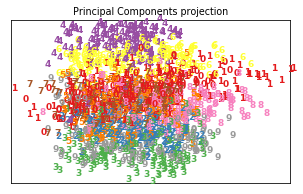

In [9]:
from sklearn import decomposition, manifold
from matplotlib import offsetbox

 # build plot function
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

 # Projection to the first 2 principal components
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,"Principal Components projection")


### b)

Aligned the data sets. Score is   119316.4  


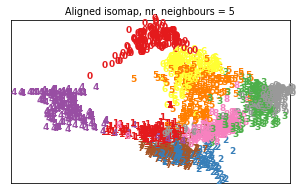

In [16]:
# Isomap projection of the digits dataset
X_iso = manifold.Isomap(n_neighbors=5, n_components=2).fit_transform(X)
X_ali = align(X_pca, X_iso)
plot_embedding(X_ali[0], "Aligned isomap, nr. neighbours = 5")

Aligned the data sets. Score is    93371.3  


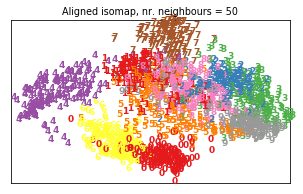

In [14]:
# Isomap projection of the digits dataset
X_iso = manifold.Isomap(n_neighbors=50, n_components=2).fit_transform(X)
X_ali = align(X_pca, X_iso)
plot_embedding(X_ali[0], "Aligned isomap, nr. neighbours = 50")

Aligned the data sets. Score is    92367.6  


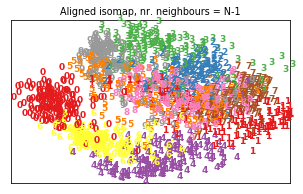

In [17]:
# Isomap projection of the digits dataset
X_iso = manifold.Isomap(n_neighbors=N-1, n_components=2).fit_transform(X)
X_ali = align(X_pca, X_iso)
plot_embedding(X_ali[0], "Aligned isomap, nr. neighbours = N-1")

### c)
We can see that the classes are best seperated in to the most compact regions in the isomapping using 5 neighbours. Using 50 neighbours, we see that the classes are stil seperated, but less compact. Using N-1 neighbours gives the worst seperation.

When the score is zero, it means that the distance for all original data to the their transformed data is zero. Therefore nothing changed and thus the transformation did not do anyting. The score becomes zero when the transformation does not change anything.

## Classical Multidimensional Scaling (6 Points, 1+2+2+1)

Show that for mean-centered data sets we can recover inner products using
pairwise distance information only. This is used by the isomap embedding algorithm.

We are given all squared pairwise distances of an otherwise unknown
point set ${\bf p}_1,\dots, {\bf p}_n \in \mathbb{R}^d$, i.e., we are given 
for all $1 \leq i,j \leq n$ the values

$$  d_{ij} = \|{\bf p}_i - {\bf p}_j\|^2. $$

We assume that the point set is mean-centered, that is 

$$ \sum_{i=1}^{n} {\bf p}_i = \vec{{\bf 0}}.$$

(where $\vec{{\bf 0}}$ is the vector of zeros)


In the following, $\langle {\bf p}_i , {\bf p}_j \rangle$ denotes the inner 
product of ${\bf p}_i$ and ${\bf p}_j$. 
Prove that the following holds true for mean-centered point sets: 

$$-2 \langle {\bf p}_i , {\bf p}_j \rangle = 
d_{ij}
- \sum_{\ell=1}^{n} \frac{d_{i\ell}}{n}   
-  \sum_{\ell=1}^{n} \frac{d_{j\ell}}{n} 
+ \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{d_{k\ell}}{n^2} 
$$

You may use the following steps in your derivation.

### a) 
Expand  $d_{ij}$ to yield an expression of $\langle {\bf p}_i, {\bf p}_j \rangle$, $\|{\bf p}_i\|^2$ and $\|{\bf p}_j\|^2$.

### b) 
Show that the following holds for any $ {\bf q} \in \mathbb{R}^d$:
$$ \sum_{1 \leq i \leq n} \langle {\bf p}_i , {\bf q} \rangle =   0$$

### c) 
Prove that 
$$ \|{\bf p}_i\|^2 = \sum_{\ell=1}^{n} \frac{d_{i\ell}}{n} - \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{d_{k\ell}}{2n^2}$$

### d) 
Combine the steps in your proof. 


## Answers:
### a)
Expand $d_{ij}$:
$$d_{ij}=\langle {\bf p}_i-{\bf p}_j,{\bf p}_i-{\bf p}_j \rangle=\langle {\bf p}_i,{\bf p}_i-{\bf p}_j \rangle-\langle {\bf p}_j,{\bf p}_i-{\bf p}_j \rangle=\langle {\bf p}_i,{\bf p}_i \rangle -\langle {\bf p}_i,{\bf p}_j \rangle-\langle {\bf p}_j,{\bf p}_i \rangle+\langle {\bf p}_j,{\bf p}_j \rangle=\|{\bf p}_i\|^2+\|{\bf p}_j\|^2-2\langle {\bf p}_i,{\bf p}_j\rangle$$

### b) 
Show that the following holds for any $ {\bf q} \in \mathbb{R}^d$:
$$ \sum_{1 \leq i \leq n} \langle {\bf p}i , {\bf q} \rangle = \langle \sum_{1 \leq i \leq n}  {\bf p}_i , {\bf q} \rangle = \langle \vec{{\bf 0}},{\bf q}\rangle = 0$$

### c) 
Prove that 
$$
\begin{align}
\sum_{\ell=1}^{n} \frac{d_{i\ell}}{n} - \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{d_{k\ell}}{2n^2}
&=\sum_{\ell=1}^n \frac{\langle {\bf p}i,{\bf p}_i\rangle - 2 \langle {\bf p}_i,{\bf p\ell}\rangle + \langle {\bf p_\ell},{\bf p_\ell}\rangle}{n}-\sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{ \langle {\bf p}k,{\bf p}_k\rangle - 2 \langle {\bf p}_k,{\bf p\ell}\rangle + \langle {\bf p_\ell},{\bf p_\ell}\rangle  }{2n^2}\\
&=\sum_{\ell=1}^{n}\frac{\langle {\bf p}i, {\bf p}_i\rangle}{n}-\frac{2}{n}\langle{\bf p}_i,\sum_{\ell=1}^n {\bf p}\ell\rangle + \sum_{\ell=1}^{n}\frac{\langle {\bf p}\ell, {\bf p}\ell\rangle}{n}-\sum_{\ell=1}^n\sum_{k=1}^{n}\frac{\langle {\bf p}k, {\bf p}_k\rangle}{2n^2}+\frac{2}{2n^2}\sum_{k=1}^n\langle{\bf p}k,\sum_{\ell=1}^n{\bf p}\ell\rangle-\sum_{\ell=1}^n\sum_{k=1}^{n}\frac{\langle {\bf p}\ell, {\bf p}\ell\rangle}{2n^2}\\
&=\langle {\bf p}i, {\bf p}_i\rangle - 0 + \sum_{\ell=1}^{n}\frac{\langle {\bf p}\ell, {\bf p}\ell\rangle}{n} - n\sum_{\ell=1}^{n}\frac{\langle {\bf p}\ell, {\bf p}\ell\rangle}{2n^2} + 0 - n\sum_{\ell=1}^{n}\frac{\langle {\bf p}\ell, {\bf p}\ell\rangle}{2n^2}\\
&=\langle {\bf p}i, {\bf p}_i\rangle + (\frac{1}{n}-2n\frac{1}{2n^2})\sum_{\ell=1}^{n}\langle {\bf p}\ell, {\bf p}\ell\rangle\\
&=\|{\bf p}_i\|^2
\end{align}
$$
(using a))

### d)
Combine these steps:
$$
\begin{align}
&d_{ij}
- \sum_{\ell=1}^{n} \frac{d_{i\ell}}{n}   
-  \sum_{\ell=1}^{n} \frac{d_{j\ell}}{n} 
+ \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{d_{k\ell}}{n^2}\\
=&\|{\bf p}_i\|^2+\|{\bf p}_j\|^2-2\langle {\bf p}_i,{\bf p}_j\rangle
- \sum_{\ell=1}^{n} \frac{d_{i\ell}}{n}   
-  \sum_{\ell=1}^{n} \frac{d_{j\ell}}{n} 
+ \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{d_{k\ell}}{n^2}\\
=&\sum_{\ell=1}^{n} \frac{d_{i\ell}}{n} - \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{d_{k\ell}}{2n^2}
+ \sum_{\ell=1}^{n} \frac{d_{j\ell}}{n} - \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{d_{k\ell}}{2n^2}
- 2\langle {\bf p}_i,{\bf p}_j\rangle
- \sum_{\ell=1}^{n} \frac{d_{i\ell}}{n}   
-  \sum_{\ell=1}^{n} \frac{d_{j\ell}}{n} 
+ \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{d_{k\ell}}{n^2}\\
=&-2\langle {\bf p}_i,{\bf p}_j\rangle
\end{align}
$$

## Locality-sensitive hashing (4 Points, 2+1+1)

### a) 

Prove that if the Jaccard Similarity of two sets is $0$, then minhashing always gives a correct estimate of the Jaccard similarity

### b) 
Let $H$ be a family of $(d_1,d_2,p_1,p_2)$-locality-sensitive hash functions.
Assume that $p_2=0$ and assume we have a total numer of $m$ hash
functions from this family available.  Which combination of AND-constructions
and OR-constructions should we use to maximally amplify the hash family?

### (c) 

Let $H$ be a family of $(d_1,d_2,p_1,p_2)$-locality-sensitive hash functions.
Assume that $p_2=\frac{1}{n}$ and assume we have $n$ data points $\bf P$
which are stored in a hash table using a randomly chosen function $h$ from $H$.
Given a query point $\bf q$, we retrieve the points in the hash bucket with index $h(\bf q)$ to search 
for a point which has small distance to $\bf q$. 
Let $X$ be a random variable that is equal to the size of the set 

$$
\begin{aligned}
\left\{{\bf p \in P}~:~ h({\bf p})=h({\bf q}) ~\wedge~ d({\bf p,q}) \geq d_2\right\}\
\end{aligned}
$$

which consists of the false positives of this query.
Derive the expected number of false-positives $E\left[ X \right]$.

## Answers:
### a)
By defenition, the Jaccard Similarity of two sets is $0$ when $|S\cap T|=0$. This is the case when the two sets are disjunct. In other words, there are no element that are both in $S$ and in $T$. Because the minhash $h(S_i)$ is the index of first row from the top which has a $1$ and no two element are the same for $S_i$ and $S_j$, the probability of $h(S_i)$ and $h(S_j)$ beiing equal is zero.

### b) 
We would like to make $p_1$ as large as possible. With the OR-constructions, we can increase $p_1$ at the cost of increasing $p_2$, but $p_2$ is assumed to be $0$, so $1-(1-p_2)^L$ stays 0. So only using OR gives us a high $p_1$ value, while keeping $p_2$ zero.

### c)
$$
\mathbb{E}(X) =\sum x \cdot \mathbb{P}(X=x)
$$

Call 
$$
\begin{align}
P' & =\big|\{p\in P: d({\bf p,q})\geq d_2\}\big| \\
n' & = \big|P'\big| 
\end{align}
$$
Then 
$$ \mathbb{P}\left(X=x\right)=\binom{x}{n'}\cdot \big(\frac{1}{n}\big)^x\cdot \big(\frac{n-1}{n}\big)^{n'-x}$$
Then we get 
$$ \mathbb{E}(X) =\sum_{x=1}^{n'} x \cdot \binom{x}{n'}\cdot \big(\frac{1}{n}\big)^x\cdot \big(\frac{n-1}{n}\big)^{n'-x}$$